# Lab session 3 : From textual data modelling to text classification

## Lecture 3 recap: Task specific Modelling of Textual Data 
1. Preprocessing textual data (word segmentation, encoding)
2. Modelling: 
  a. Sequence Labelling (MEMMs, CRF)  
  b. Sequence Classification   
3. Evaluation 

## Lab objective

In this session, we will focus on Sequence Classification.
We will classify tweets according to their sentiment mainly using Scikit-learn as our machine learning toolkit. To do so you will have to:

## 1. Preprocess the data
Adapt and combine the previous cleaning function (Lab session 2) with Scikit-learn Count Vectorizer or Tf-Idf Vectorizer for the text (X). 
Using the LabelBinarizer function for labels (Y).

## 2. Create training, dev, and test sets

## 3. Apply basic classifiers for multiclass classification: Support Vector Machines, Random Forest.

## 4. Create a function that gives a quantitative evaluation for a prediction: 
- precision
- recall
- f1-score: macro and weighted
- accuracy
- roc curve for each label

## 5. Compare prediction scores using previously trained embeddings (Lab session 2)

In [ ]:
! wget -O tweets.csv https://raw.githubusercontent.com/gguibon/gguibon.github.io/master/Tweets.csv
! wget https://d1p17r2m4rzlbo.cloudfront.net/wp-content/uploads/2016/03/Political-media-DFE.csv

In [ ]:
import pandas as pd
dfTweets = pd.read_csv('tweets.csv')
df_pol = pd.read_csv('Political-media-DFE.csv', encoding='latin-1')

Re train pol embeddings (copied and pasted from lab session 2 correction) for later use

In [ ]:
# Usage of Phrases and Phraser from gensim
import nltk
from gensim.models.phrases import Phrases, Phraser
from nltk.tokenize import TreebankWordTokenizer, TweetTokenizer
nltk.download('punkt')
sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')

def remove_hashtags(tokens):
  tokens = map(lambda x: x.replace('#', ''), tokens)
  return list(tokens)

def remove_url(tokens):
  tokens = filter(lambda x: "http" not in x, tokens)
  return list(tokens)

def remove_html(tokens):
  tokens = filter(lambda x: x[0]+x[-1] != '<>', tokens)
  return list(tokens)

from tqdm import tqdm
def tokenize_url_hashtags(corpus, tweets=False):
  if tweets:
    tokenizer = TweetTokenizer()
  else:
    tokenizer = TreebankWordTokenizer()  
    # Life hack : treebank word tokenizer won't keep html code in one token.
    # To preprocess economics news corpus, use tweettokenizer. 
  tokenized_sentences = []
  for sample in tqdm(corpus):
    # separating sentences
    for sentence in sent_detector.tokenize(sample):
      tokens = tokenizer.tokenize(sentence)
      tokens = remove_url(tokens)
      tokens = remove_html(tokens)
      tokens = remove_hashtags(tokens)
      tokens = list(map(lambda x: x.lower(), tokens))
      tokenized_sentences.append(tokens)
  return tokenized_sentences

cleaned_pol = tokenize_url_hashtags(df_pol.text.array, tweets=True)


from gensim.models.phrases import Phrases, Phraser

def clean_corpus(corpus, threshold=50, tweets=False):
  tokenized_sentences = tokenize_url_hashtags(corpus, tweets=tweets)
  phrases = Phrases(tokenized_sentences, threshold=threshold)

  # This lets you use it with less RAM and faster processing.
  # But it will no longer be possible to update the detector with new training 
  # samples
  phraser = Phraser(phrases)

  # Merging multi-word expressions in the tokenization
  clean_corpus = []
  for sentence in tokenized_sentences:
    clean_corpus.append(phraser[sentence])
  
  return clean_corpus

from gensim.models import Word2Vec
from multiprocessing import cpu_count

cpu = cpu_count()
print('The virtual instance has {} cpus, that will be used to train the word2vec model'.format(cpu))

# We will just get the "WordVectors" parameter from the trained Word2Vec model.
# Otherwise, we could continue training with some more exemples that could be
# fed on the fly to the model.
print("Training the political W2V ...")
pol = Word2Vec(cleaned_pol, size=100, window=5, min_count=3, workers=cpu)
pol.train(cleaned_pol, total_examples=len(cleaned_pol), epochs=10)
pol_wv = pol.wv

Explore the dataset

In [ ]:
dfTweets.columns

In [ ]:
print(dfTweets.text.iloc[0], dfTweets.airline_sentiment.iloc[0])

In [ ]:
dfTweets.head()

In [ ]:
dfTweets.shape

Here you can find some code for exploring the dataset using unsupervised learning (clustering) and visualization. A good clustering would require better tuned features.

In [ ]:
# HIDDEN for exercice purposes : solve the "Using pre trained embeddings section to complete this and rerun the clustering"

# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn import preprocessing
# import numpy as np

# def tokens2vectors(tokenCorpus):
#   ''' transforms our X into a list of list of vec (2D array) '''
#   # uncompleted for exercice purposes : solve the "Using pre trained embeddings section to complete this and rerun the clustering"

# X = tokens2vectors(dfTweets.loc[:, "text"])



In [ ]:
# HIDDEN for exercice purposes : solve the "Using pre trained embeddings section to complete this and rerun the clustering"

# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=3, random_state=42, n_init=20, max_iter=1000, verbose=0).fit(X)

In [ ]:
# HIDDEN for exercice purposes : solve the "Using pre trained embeddings section to complete this and rerun the clustering"


# clusters = kmeans.predict(X)

In [ ]:
# HIDDEN for exercice purposes : solve the "Using pre trained embeddings section to complete this and rerun the clustering"


# print(clusters[0], dfTweets["text"][0], dfTweets["airline_sentiment"][0])

# print(clusters[1], dfTweets["text"][1], dfTweets["airline_sentiment"][1])

In [ ]:
# HIDDEN for exercice purposes : solve the "Using pre trained embeddings section to complete this and rerun the clustering"


# from sklearn.manifold import TSNE
# tsne = TSNE(n_components=2, verbose=1, perplexity=30, learning_rate=100.0, early_exaggeration=2., n_iter=250)
# X_tsne = tsne.fit_transform(X)

In [13]:
# HIDDEN for exercice purposes : solve the "Using pre trained embeddings section to complete this and rerun the clustering"

# import plotly.express as px
# import plotly.graph_objects as go
# import numpy as np


# mapColors = {0:'lightseagreen', 1:'blueviolet', 2:'tomato'}
# mapSentColors = {'positive':'lightseagreen', 'neutral':'blueviolet', 'negative':'tomato'}
# colorsClusters = [mapColors[c] for c in clusters]
# colorsSentiment = [mapSentColors[s] for s in dfTweets.airline_sentiment]

# fig = go.Figure(data=go.Scatter(
#     x = X_tsne[:, 0],
#     y = X_tsne[:, 1],
#     hovertext = list(zip(dfTweets.loc[:, "text"], dfTweets.airline_sentiment)),
#     mode='markers+text',
#     marker=dict(
#         size=4,
#         color=colorsClusters, # colorsClusters or colorsSentiment
#         colorscale='Viridis',
#         showscale=True,
#     )
# ))
# fig.show()

Output hidden; open in https://colab.research.google.com to view.

# Sentiment Classification Test




To start the sentiment classification mockup, you need to check you data.

In [ ]:
# prepare data for a basic classification
X = dfTweets.loc[:, "text"]
print(X)
print(X.shape)

In [ ]:
y = dfTweets.airline_sentiment
print(y)
print(y.shape)

## Step 1: Adapt the cleaning function tokenize_url_hashtags for this corpus

We take our previous cleaning function and utils and apply it on this dataset. But in order to do so you need to slightly adapt it (we do not need sentences but whole tweets as String)

In [ ]:
from tqdm import tqdm
def tokenize_url_hashtags_4tweets(corpus):
  ''' modified version for our data structure (flattened and only for tweets proc)'''

  # @TODO Adapt me and apply me!

  return ...

## Step 2: Create Training set, Dev set and Test set


In a supervised classification task it is a good practice to slit the dataset into 3 sets:
- Training set: **60%**: used to train the classifier and obtain a model
- Dev set: **20%**: used to apply the model and check performance while tuning it
- Test set: **20%** used as the final performance check to see if the generalization is ok

Suggested convenient class: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
# @TODO create train 60% 



In [ ]:
# @TODO create dev 20% test 20% (hence 50% from the 40%)


## Preprocessing Text and Labels


We obtained our cleaned text in separate sets. Now we need to transform the text (the X sets) into vectors. Multiple approaches are available there. 
Start by using the CountVectorizer (bag of words and their occurrence counts in a sparse matrix).

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer

Processing Text (X)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# @TODO for training set

In [ ]:
# @TODO same goes for dev set


You need to do the same for labels. A binarization is the way to go as we want a matrix representing each label. 

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html

Processing Labels (y)

In [ ]:
from sklearn import preprocessing
# @TODO binarize labels manually or using scikitlearn (recommended)

## Basic Support Vector Machine


Now that we extracted very basic features from our tweets (bag of word), we need to apply a simple classifier to predict for each tweet if it is positive neutral or negative. This is a multiclass classification. 

You will use **Support Vector Machine** (SVM) for this but in a multiclass fashion (SVM separate data between two labels but we have three labels). For this we can apply a SVM for each label trying to find if it belongs to the target label or something else: this is a **One Versus Rest** approach. Please use the two links below (linearSVC is faster, hence best suited for this exercice)

The classifier should be trained on train set and apply on dev set.

https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html#sklearn.multiclass.OneVsRestClassifier

https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC

Do not forget the main methods:

```python
.fit(X)
```

```python
.predict(y) # returns a list of predictions 
```



In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
# @TODO init and train classifier on training set

In [ ]:
# @TODO predict on dev set using trained classifier

In [ ]:
# @TODO print the first 5 rows for verified labels and predicted ones

## Create an eval function that accept y_true, y_pred, the label binarizer and the trained classifier as arguments.

It should display multiple quantitative evaluations:
- precision
- recall
- f1-score

*y_true* = the verified labels (from the dataset)
*y_pred* = the predicted labels (by the LinearSVC)

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix


For the ROC curve you need to compute it separtely for each label *y* and then plot it using the mockup. 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html#sklearn.metrics.auc

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve





In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sn

def show_eval(y_true, y_pred, lb_trained, clf):
  ''' 
  Show eval metrics.  Takes binarized y true and y pred along with trained binarizer for label names
  '''
  
  # @TODO complete me

  labels = ['negative', 'neutral', 'positive']
  

  # calculate ROC and auc

  # config plot sizes
  # left here to display plots
  # requires you to set multiple variables: 
  # - df_cm (pandas dataframe confusion matrix)
  # - roc_auc (dict {label_index:auc_score})
  # - frp and trp : false/true positives as a dict {label_index:value } -- see roc_curve documentation link ---
  sn.set(font_scale=1.2)
  sn.heatmap(df_cm, annot=True, annot_kws={"size": 18}, cmap='coolwarm', linewidth=0.5, fmt="")
  plt.show()

  for i, label in enumerate(labels):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for '+label)
    plt.legend(loc="lower right")
    plt.show()


              precision    recall  f1-score   support

    negative       0.81      0.90      0.85      1855
     neutral       0.59      0.51      0.55       607
    positive       0.76      0.53      0.63       466

    accuracy                           0.76      2928
   macro avg       0.72      0.65      0.68      2928
weighted avg       0.75      0.76      0.75      2928



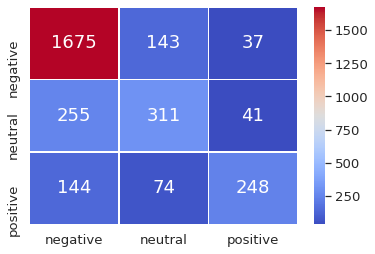

negative 0.7892743473094807
neutral 0.7142979329905944
positive 0.7770436819920299


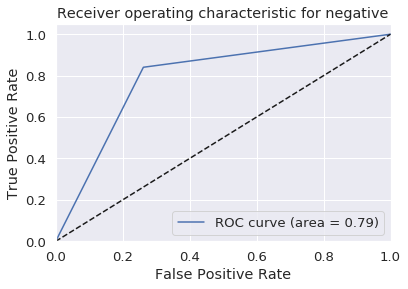

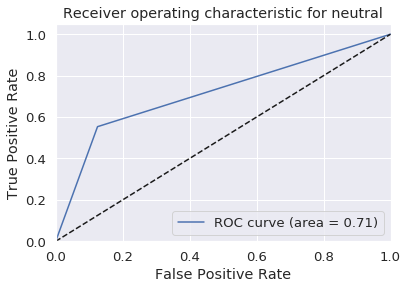

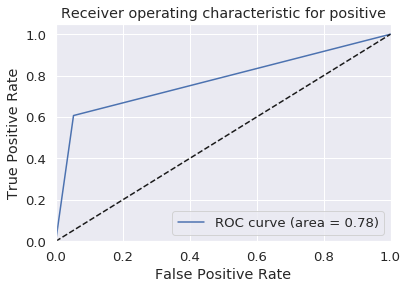

In [ ]:
show_eval(y_dev_lb, y_pred_svm, lb_trained, clf_svm)

## Using Random Forest (Multiple decision trees)

Now apply the same task and logic but using **Random Forest** instead.

Please note that you do not need the **OneVSRestClassifier** class for this one.

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Tips: 
- for faster computation reduce the number of trees in the forest (i.e. estimators)
```python
n_estimators=300
```
- use all available cores from the CPU:
```python
n_jobs=-1
```


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# @TODO train RF classifier

In [ ]:
# @TODO use trained classifier and predict on dev
# @TODO use eval function to display eval metrics

## Using pre-trained word embeddings

Apply the same task but using the embeddings vectors trained in the previous session and available in gensim model variable **pol_vw**. Use these embeddings as an input for **LinearSVC** and **Random Forest** classifiers.

Beware of the out of vocabulary words, find a way to handle them.

Remember we need a two dimensional array as a result:
(8784, 100)

In [ ]:
# Create a function to transform the corpus into an embedding one
def tokens2vectors(tokenCorpus):
  ''' transforms our X into a list of list of vec (2D array) '''
  # @TODO complete me


# @TODO use tokens2vectors for training and dev sets


In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
# @TODO Train linearSVC on new X with embeddings vectors

In [ ]:
# @TODO predict sentiment on dev set (embedding version)

# @TODO display its evaluation

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# @TODO train RF classifier on train set (embeddings version)

In [ ]:
# @TODO predict sentiment on dev set (embedding version) using random forest

# @TODO display its evaluation

Here you go. You did apply some very basic supervised learning on tweets using extracted generic textual features (bag of words with counts) and two types of classifiers (decision tree based and support vector machine based).

Congratulations and see you soon for the next session.
